<a href="https://colab.research.google.com/github/Harshit1Deep/Inventory-Management-system/blob/main/hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/hotel_booking.csv")
df.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677


In [5]:
df.shape

(34576, 36)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df['meal'].value_counts()

,count
meal,
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798


In [ ]:
df['children'].value_counts()

,count
children,
0.0,110800
1.0,4861
2.0,3652
3.0,76
10.0,1


In [ ]:
df['country'].value_counts()

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
DJI,1
BWA,1
HND,1


In [ ]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [ ]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [ ]:
 len(df[df['adults']==0])

403

In [ ]:
 len(df[df['babies']==0])

118473

In [ ]:
filter = (df['children'] == 0) & (df['adults'] ==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,Transient-Party,0.00,0,0,Check-Out,2015-10-06,Colleen Hernandez,Colleen.H25@yandex.com,863-349-5397,************8042
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,Transient,0.00,0,0,Check-Out,2015-10-12,Mark Martinez,Martinez.Mark@yahoo.com,969-893-1222,************9670
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,Transient-Party,0.00,0,0,Check-Out,2015-11-23,Carrie Carney,CarrieCarney@yandex.com,944-344-7905,************8964
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,Transient-Party,0.00,0,0,Check-Out,2016-01-04,Summer Stewart,Stewart_Summer84@aol.com,125-574-6642,************1069
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,Transient-Party,0.00,0,0,Check-Out,2016-01-05,Brian Buchanan,Brian.B@yahoo.com,946-176-5726,************9836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,Transient,100.80,0,0,Check-Out,2017-06-30,Gregory Ashley,GregoryAshley51@outlook.com,784-717-9035,************9561
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,Transient,0.00,1,1,Check-Out,2017-07-01,Christina Mcdonald,Mcdonald.Christina@protonmail.com,487-056-2442,************8308
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,Transient,73.80,0,0,Check-Out,2017-07-17,Megan Johnson,MJohnson@protonmail.com,501-374-4690,************3910
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,Transient-Party,22.86,0,1,Check-Out,2017-07-22,Alexandra Riley,Alexandra.Riley55@mail.com,318-771-9720,************6778


In [ ]:
data = df[~filter]

In [ ]:
data.shape

(119210, 36)

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [ ]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,Transient,140.75,0,1,Check-Out,2017-09-04,Wanda Jones,Wanda_J@yandex.com,379-374-7947,************8581
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,Transient,99.00,0,0,Check-Out,2017-09-05,Betty Taylor,BTaylor@yandex.com,114-632-1395,************1795
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,Transient,209.00,0,0,Check-Out,2017-09-05,Cesar Moreno,Cesar_M50@comcast.net,666-379-7260,************7835
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,Transient,87.60,0,0,Check-Out,2017-09-06,Jose Andersen,Andersen_Jose@protonmail.com,656-714-5930,************7923
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,Transient,96.14,0,2,Check-Out,2017-09-06,James Mccarty,James_M@att.com,689-204-7523,************7994
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [ ]:
#  from where the guests come from and perform Spatial analysis too

In [ ]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157


In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['is_canceled'].unique()

array([0, 1])

In [ ]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] ==0)]
City = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] ==0)]


In [ ]:
resort.shape

(28927, 36)

In [ ]:
City.shape

(46084, 36)

In [ ]:
resort['country'].value_counts()

,count
country,
PRT,10184
GBR,5922
ESP,3105
IRL,1734
FRA,1399
...,...
UGA,1
COM,1
MUS,1


In [ ]:
resort['country'].value_counts().index

Index(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'DEU',  'CN', 'NLD',     0, 'USA',
       ...
       'MKD', 'SMR', 'BDI', 'SYR', 'CYM', 'UGA', 'COM', 'MUS', 'BIH', 'SAU'],
      dtype='object', name='country', length=119)

In [ ]:
labels = resort['country'].value_counts().index
values = resort['country'].value_counts()

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [ ]:
#press shift + tab to see all functions of pie
trace = go.Pie(labels = labels , values = values,hoverinfo='label+percent' ,textinfo='value')

In [ ]:
iplot([trace])

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
country_wise = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise.columns = ['country','No of Guests']
country_wise

,country,No of Guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
#map graph
import folium
from folium.plugins import HeatMap

In [ ]:
b = folium.Map()

In [ ]:
country_wise.dtypes

,0
country,object
No of Guests,int64


In [ ]:
guests = px.choropleth(country_wise,locations=country_wise['country'],color = country_wise['No of Guests'],hover_name=country_wise['country'],title="Home Country of Guests")

In [ ]:
guests.show()

In [ ]:
# how much guests pay for per night?
#how does the priceper night vary over the year?

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
data2 = data[data['is_canceled'] == 0]

In [ ]:
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [ ]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

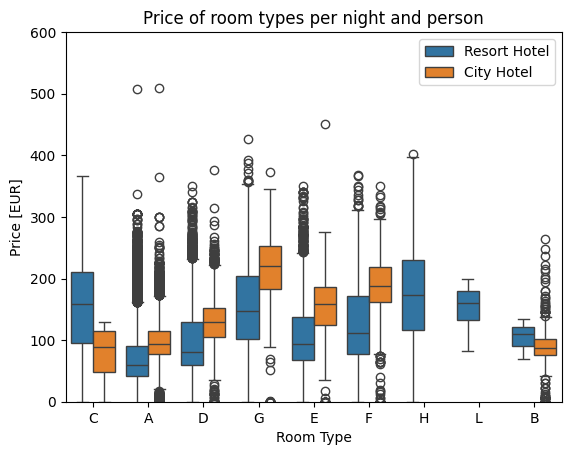

In [ ]:
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel',data = data2)
plt.title("Price of room types per night and person")
plt.xlabel("Room Type")
plt.ylabel("Price [EUR]")
plt.legend(loc = 'upper right')
plt.ylim(0,600)
plt.show()

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
data_resort = resort[resort['is_canceled'] == 0]

In [ ]:
data_resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,Transient,89.75,0,0,Check-Out,2017-09-10,Willie Hamilton,Hamilton_Willie@mail.com,172-436-4780,************5145
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,Transient-Party,202.27,0,1,Check-Out,2017-09-10,Carrie Walker,Carrie_Walker@yahoo.com,141-149-4764,************9816
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,Transient,153.57,0,3,Check-Out,2017-09-12,Joshua Small,Joshua_Small@aol.com,769-653-1129,************7686
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,Contract,112.80,0,1,Check-Out,2017-09-14,Michele Hanson,MHanson@yahoo.com,670-269-4799,************8961


In [ ]:
data_city = City[City['is_canceled'] ==0]

In [ ]:
data_city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,Transient,0.00,0,0,Check-Out,2015-07-03,Elizabeth Ross,Ross.Elizabeth@att.com,313-076-6204,************4378
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,Transient-Party,58.67,0,0,Check-Out,2015-07-05,Mr. Christopher Davis MD,Mr._M@aol.com,855-025-3048,************4574
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,Transient-Party,86.00,0,0,Check-Out,2015-07-05,Crystal Pierce,CrystalPierce93@zoho.com,672-975-9750,************1962
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,Transient-Party,43.00,0,0,Check-Out,2015-07-05,Jeremy Wilcox,Jeremy_Wilcox@hotmail.com,100-100-0744,************4150
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,Transient-Party,86.00,0,0,Check-Out,2015-07-05,Anna Melendez,Anna_M70@outlook.com,844-417-3641,************2464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [ ]:
final = resort_hotel.merge(city_hotel, on='arrival_date_month')
final.columns = ['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
!pip install sort_dataframeby_monthorweek

  Preparing metadata (setup.py) ... done
  Created wheel for sort_dataframeby_monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3420 sha256=96b78315d362226de0f0f5a032c7a66ede6163fabc5f55333b36d7920983da6e
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort_dataframeby_monthorweek


In [ ]:
!pip install sorted_months_weekdays





  Preparing metadata (setup.py) ... done
  Created wheel for sorted_months_weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3224 sha256=5dabf61bdf3e26da192131f934a0987412a8b11f6f9b7b02846e7b06d8555515
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted_months_weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

In [ ]:
final = sd.Sort_Dataframeby_Month(df = final,monthcolumnname = 'month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [ ]:
px.line(final,x='month',y=['price_for_resort','price_for_city_hotel'],title = "Room Price per night over the month")

In [ ]:
#distribution of nights spent at hotels by market segment and hotel type
#Analysis prefernce by guests , what they basicallyprefer in meal?

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
data['market_segment'].value_counts()

,count
market_segment,
Online TA,56408
Offline TA/TO,24182
Groups,19791
Direct,12582
Corporate,5282
Complementary,728
Aviation,235
Undefined,2


<Axes: xlabel='market_segment', ylabel='stays_in_weekend_nights'>

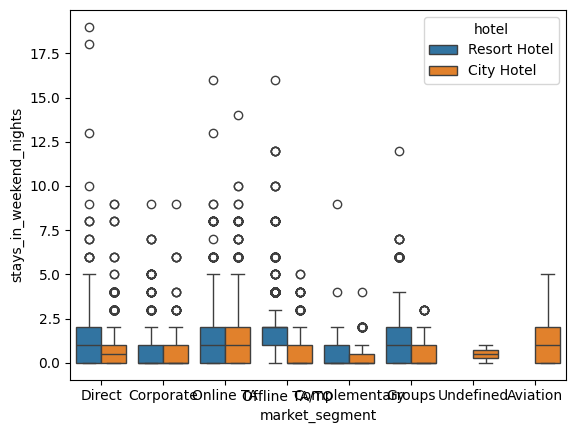

In [ ]:
sns.boxplot(x='market_segment', y='stays_in_weekend_nights', hue='hotel',data = data)


In [ ]:
data['meal'].value_counts()

,count
meal,
BB,92236
HB,14458
SC,10549
Undefined,1169
FB,798


In [ ]:
px.pie(data,names = data['meal'].value_counts().index,values = data['meal'].value_counts().values,hole = 0.4)

Analysis Special Request done by Customer

In [ ]:
data.groupby(['hotel','meal']).agg({'meal':'count'}).unstack()

meal                                  
meal               BB     FB      HB       SC Undefined
hotel                                                  
City Hotel    62233.0   44.0  6412.0  10474.0       NaN
Resort Hotel  30003.0  754.0  8046.0     75.0    1169.0

Text(0.5, 1.0, 'Total Special Request')

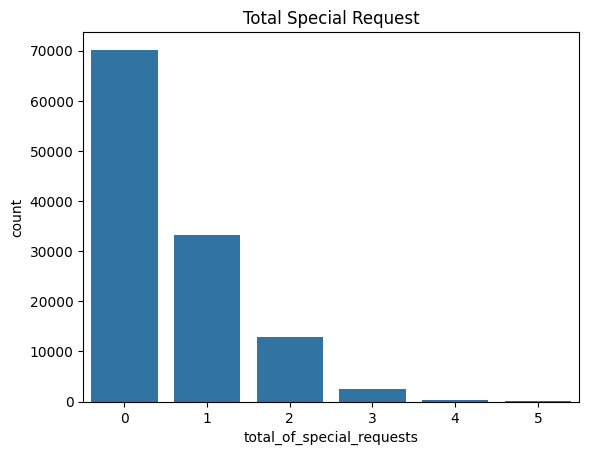

In [ ]:
sns.countplot(x='total_of_special_requests',data = data)
plt.title("Total Special Request")


Text(0.5, 1.0, 'Total Special Request')

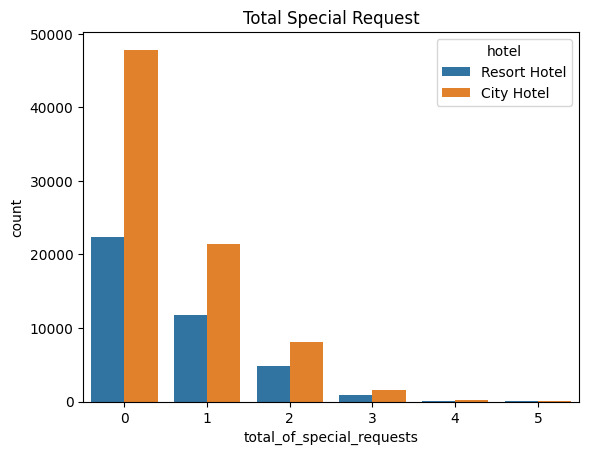

In [ ]:
sns.countplot(x='total_of_special_requests',data = data, hue='hotel')
plt.title("Total Special Request")


In [ ]:
data.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'})

total_of_special_requests
total_of_special_requests is_canceled                           
0                         0                                36667
                          1                                33534
1                         0                                25867
                          1                                 7316
2                         0                                10086
                          1                                 2866
3                         0                                 2049
                          1                                  445
4                         0                                  304
                          1                                   36
5                         0                                   38
                          1                                    2

In [ ]:
pivot = data.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'counts'}).unstack()
pivot

counts       
is_canceled                    0      1
total_of_special_requests              
0                          36667  33534
1                          25867   7316
2                          10086   2866
3                           2049    445
4                            304     36
5                             38      2

<Axes: xlabel='total_of_special_requests'>

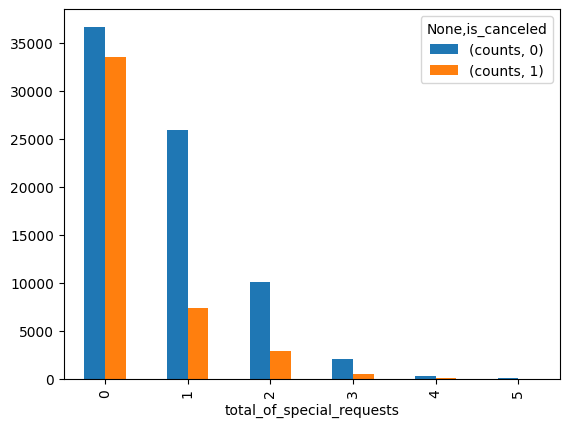

In [ ]:
pivot.plot(kind = 'bar')

In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
data_resort.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
busy_resort = data_resort['arrival_date_month'].value_counts().reset_index()


In [ ]:

busy_resort.columns

Index(['arrival_date_month', 'count'], dtype='object')

In [ ]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [ ]:
final_rush = rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no of guests in resort','no of guests in city']
final_rush

,month,no of guests in resort,no of guests in city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
final_rush = sd.Sort_Dataframeby_Month(df = final_rush,monthcolumnname = 'month')
final_rush

,month,no of guests in resort,no of guests in city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [ ]:
final_rush.dtypes

,0
month,object
no of guests in resort,int64
no of guests in city,int64


In [ ]:
px.line(data_frame=final_rush,x='month',y=['no of guests in resort','no of guests in city'],title='Total no of guests per month')

In [ ]:
#How long do people stat in hotels
#Bookings by market segment

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
filter = data['is_canceled'] == 0
clean_data = data[filter]

In [ ]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
clean_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
clean_data['total_nights_spend'] = clean_data['stays_in_weekend_nights']+clean_data['stays_in_week_nights']

<ipython-input-99-431845598765>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'total_nights_spend'],
      dtype='object')

In [ ]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_nights_spend
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2


In [ ]:
stay = clean_data.groupby(['total_nights_spend','hotel']).agg('count').reset_index()
stay = stay.iloc[:,0:3]
stay.head()

,total_nights_spend,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [ ]:
stay =stay.rename(columns = {'is_canceled':'Number of stay'})
stay.head()

,total_nights_spend,hotel,Number of stay
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


<Axes: xlabel='total_nights_spend', ylabel='Number of stay'>

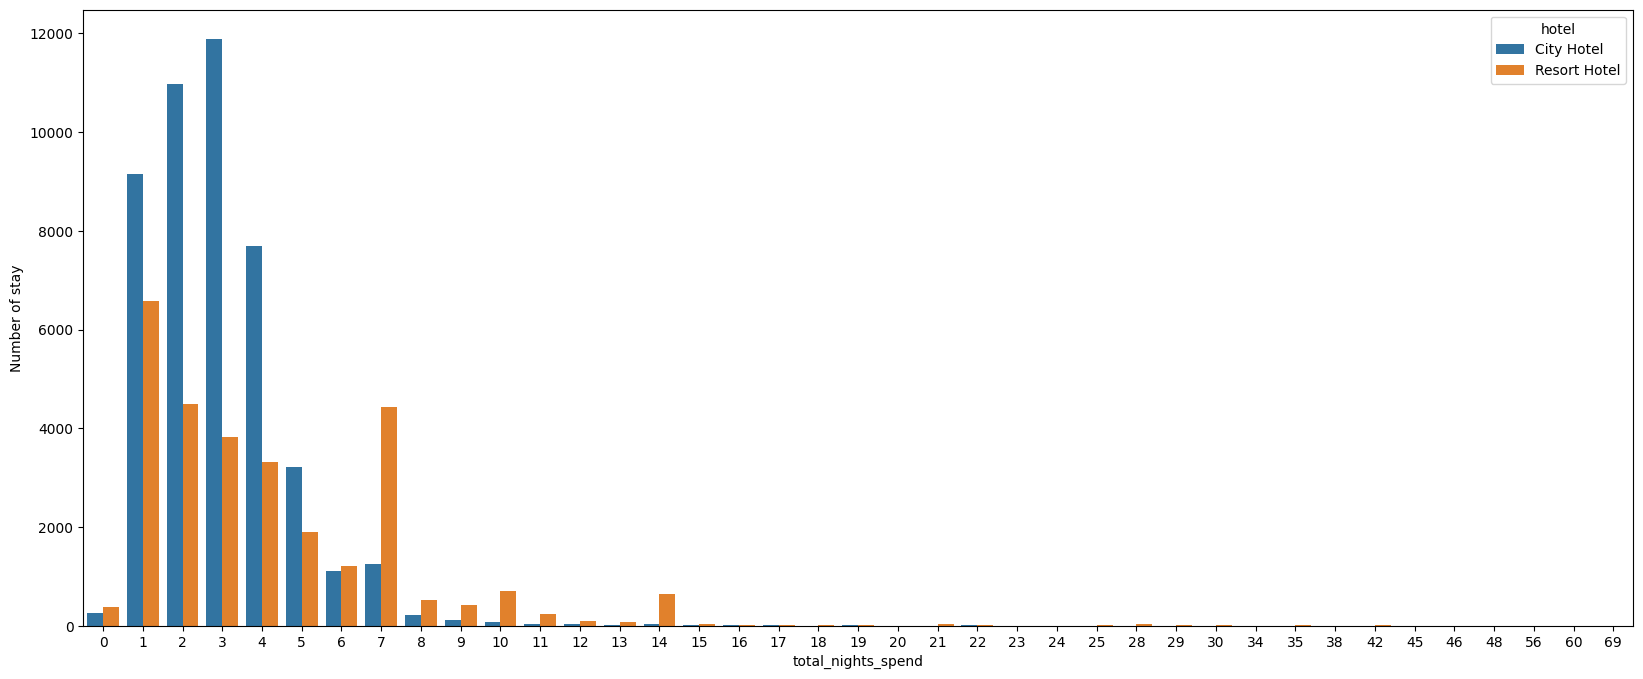

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='total_nights_spend',y='Number of stay',hue='hotel',hue_order=['City Hotel','Resort Hotel'],data=stay)

In [ ]:
#Booking by market segment

In [ ]:
clean_data['market_segment'].value_counts()

,count
market_segment,
Online TA,35673
Offline TA/TO,15880
Direct,10648
Groups,7697
Corporate,4291
Complementary,639
Aviation,183


In [ ]:
fig = px.pie(clean_data,values=clean_data['market_segment'].value_counts().values,names=clean_data['market_segment'].value_counts().index,title='Booking per Market Segment')
fig.update_traces(rotation = 90, textinfo ="percent+label" )
fig.show()

In [ ]:
#how many books were canceled
#which month have the highest number of cancelations?

In [ ]:
#how many books were canceled


In [ ]:
canceled_data = data['is_canceled']

In [ ]:
sns.countplot(x,y,hue,palette)
plt.show()

In [ ]:
# Example dataset (you can use any dataset with categorical data)
# sns.load_dataset('dataset_name') can be used to load built-in datasets like 'titanic' or 'iris'

sns.countplot(x='category_column', data=your_dataframe, hue='optional_column', palette='color_palette')

# Show plot
plt.show()


NameError: name 'your_dataframe' is not defined